In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2

#this was the method I ended up getting to work for connecting to my database
connct = psycopg2.connect('dbname=hp_employ_db user= postgres password = 23Tiafdtd32  host = 127.0.0.1 port=5432')


In [11]:
#read in everything from the employees table
employees = pd.read_sql("SELECT * FROM employees", connct)

employees.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [14]:
#read in titles and rename a key in preparation for merge
titles = pd.read_sql("SELECT * FROM titles", connct)

titles = titles.rename(columns = {'title_id':'emp_title'})

titles.head()

,emp_title,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [17]:
#merging data - a left join is useful because every value in the employees table needs a value from the titles table

emp2 = pd.merge(employees, titles, how = 'left', on="emp_title")

emp2.head(10)

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,Senior Engineer
5,263976,e0003,1959-10-30,Eran,Cusworth,M,1986-11-14,Senior Engineer
6,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff
7,461591,s0002,1964-11-17,Xudong,Samarati,M,1985-11-13,Senior Staff
8,477657,e0002,1962-12-18,Lihong,Magliocco,M,1993-10-23,Engineer
9,219881,s0002,1956-04-24,Kwangyoen,Speek,F,1993-02-14,Senior Staff


In [20]:
#bring in salary data
salary = pd.read_sql("SELECT * FROM salaries", connct)

emp3 = pd.merge(emp2, salary, how = 'left', on="emp_no")

emp3.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,Engineer,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,Engineer,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,Senior Engineer,40000


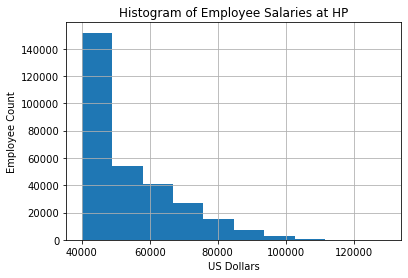

In [24]:
#salary histogram
salary['salary'].hist()

plt.xlabel('US Dollars')
plt.ylabel('Employee Count')
plt.title('Histogram of Employee Salaries at HP')

plt.show()

In [26]:
#data manipulation for bar chart plotting

salary_by_t = emp3[['title', 'salary']].copy()

sbt = salary_by_t.groupby('title').mean()

sbt

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


In [42]:
salary_by_t.describe()

,salary
count,300024.000000
mean,52970.732451
std,14301.478491
min,40000.000000
25%,40000.000000
50%,48681.000000
75%,61758.000000
max,129492.000000


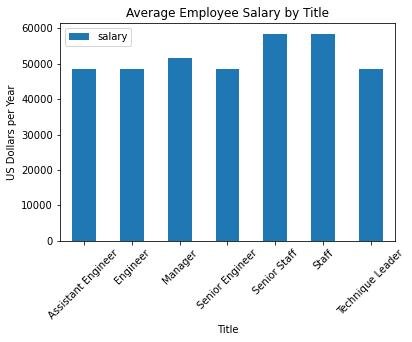

In [30]:
#plot the barchart from the groupby dataframe

sbt.plot(kind = "bar", rot = 45)
plt.title('Average Employee Salary by Title')
plt.xlabel('Title')
plt.ylabel('US Dollars per Year')
plt.show()

In [34]:
# this is just for my own curiosity

salary_by_s = emp3[['sex', 'salary']].copy()

sbs = salary_by_s.groupby('sex').mean()

sbs_m = salary_by_s.groupby('sex').median()


sbs



,salary
sex,
F,52953.836428
M,52982.002945


In [35]:
sbs_m

,salary
sex,
F,48710
M,48663


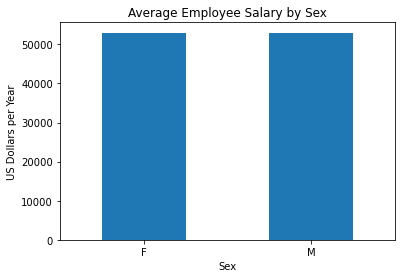

In [40]:
sbs.plot(kind = "bar", rot = 0, legend = False)
plt.title('Average Employee Salary by Sex')
plt.xlabel('Sex')
plt.ylabel('US Dollars per Year')
plt.show()

In [49]:
#looking up my employee number 499942

my_id = emp3[emp3['emp_no'] == 499942]

my_id

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title,salary
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,Technique Leader,40000
